In [1]:
#Programa que implementa computacionalmente a wavelet de Ricker
from scipy import signal
import numpy as np 
import matplotlib.pyplot as plt

In [90]:

def Ricker_Wavelet(Peak_freq, Duration, Sampling) :
    t = np.linspace(-Duration/2,Duration/2,int(Duration/Sampling))
    ricker = (1. -2.*(np.pi**2)*(Peak_freq**2)*(t**2))*np.exp(-(np.pi**2)*(Peak_freq**2)*(t**2))
    return t, ricker

def getOrmsby(f,Duration, Sampling):
    assert len(f) == 4, 'Ormsby wavelet needs 4 frequencies as input'
    f = np.sort(f) #Ormsby wavelet frequencies must be in increasing order
    t = np.linspace(-Duration,Duration,int(Duration/Sampling))
    pif   = np.pi*f
    den1  = pif[3] - pif[2]
    den2  = pif[1] - pif[0]
    term1 = (pif[3]*np.sinc(f[3]*t))**2 - (pif[2]*np.sinc(f[2]*t))**2
    term2 = (pif[1]*np.sinc(f[1]*t))**2 - (pif[0]*np.sinc(f[0]*t))**2

    wav   = term1/den1 - term2/den2;
    wav /= np.amax(wav)
    return t, wav

def Butter_Wavelet(Freq_hi, Freq_low, Duration, Sampling):
    imp = signal.unit_impulse(int(Duration/Sampling), 'mid')
    b, a = signal.butter(4, Freq_hi,fs=int(Duration/Sampling))
    response_zp = signal.filtfilt(b, a, imp)
    spec = abs(np.fft.rfft(response_zp))
    low_b, low_a = signal.butter(2,Freq_low,'hp', fs=int(Duration/Sampling))
    butter_wvlt = signal.filtfilt(low_b, low_a, response_zp)
    t = np.arange(-int(Duration/Sampling)/2,int(Duration/Sampling)/2)
    return t, butter_wvlt

In [91]:
Time , Ricker_wl = Ricker_Wavelet(20,0.5,0.004)
ricker_fft = abs(np.fft.rfft(Ricker_wl))

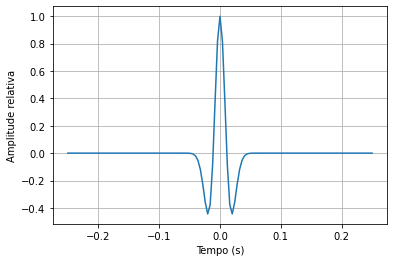

In [92]:
plt.plot(Time, Ricker_wl)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude relativa')
plt.grid()
plt.show()

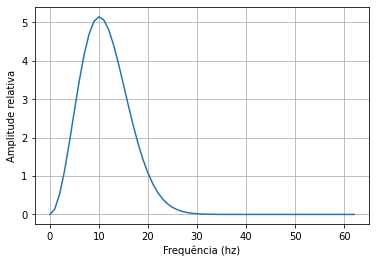

In [93]:
plt.plot(ricker_fft)
plt.xlabel('Frequência (hz)')
plt.ylabel('Amplitude relativa')
plt.grid()
plt.show()

In [94]:
time, wvlt = getOrmsby((45,10,40,5),0.5,0.004)
orms_fft = abs(np.fft.rfft(wvlt))

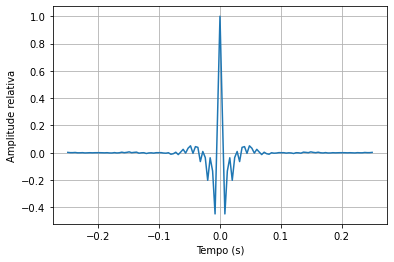

In [97]:
plt.plot(time/2,wvlt)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude relativa')
plt.grid()
plt.show()

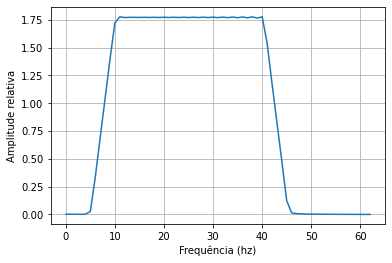

In [98]:
plt.plot(orms_fft)
plt.xlabel('Frequência (hz)')
plt.ylabel('Amplitude relativa')
plt.grid()
plt.show()

In [ ]:
t, butter_wvlt = Butter_Wavelet(55, 1.5, 0.96, 0.004)
plt.plot(t,butter_wvlt)
plt.xlim(-20,20)
plt.margins(0.1, 0.1)
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

spec = abs(np.fft.rfft(butter_wvlt))

plt.plot(spec)
plt.xlabel('Frequência (hz)')
plt.ylabel('Amplitude relativa')
plt.grid()
plt.show()